# Extra Section: MNIST

This notebook explores the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset of handwritten digits using various statistical techniques and deep models to understand the data and learn meaningful representations.

In [38]:
import torch
import torchvision
import numpy as np
from PIL import Image

In [37]:
torch.manual_seed(12)

## 1. Dataset

TODO: Describe MNIST

In [11]:
mnist_train = torchvision.datasets.MNIST('data', train=True, download=True)
mnist_test = torchvision.datasets.MNIST('data', train=False, download=True)

In [12]:
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test


In [31]:
# Inspect samples
sample = mnist_train[2]

img = sample[0]
label = sample[1]

display(img)
print(f'Label:{label}')
sample_array = np.array(img)
#print(sample_array / 256)

Label:4


## 2. Dimensionality Reduction

In [39]:
from sklearn.decomposition import PCA
from torchvision import transforms
import matplotlib.pyplot as plt

In [51]:
# Define a transform to convert the PIL image data to a tensor
transform = transforms.Compose([transforms.ToTensor()])

mnist_train = torchvision.datasets.MNIST('data', train=True, download=True, transform=transform)
mnist_test = torchvision.datasets.MNIST('data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=len(mnist_train), shuffle=False)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=len(mnist_test), shuffle=False)

train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))

print(f'MNIST Train Images: {train_images.shape}')
print(f'MNIST Test Images: {test_images.shape}')

train_images_np = train_images.numpy()
test_images_np = test_images.numpy()
train_images_np = train_images.reshape(len(train_images), 28 * 28)
test_images_np = test_images.reshape(len(test_images), 28 * 28)

print(f'Train Images Numpy: {train_images_np.shape}')
print(f'Test Images Numpy: {test_images_np.shape}')

MNIST Train Images: torch.Size([60000, 1, 28, 28])
MNIST Test Images: torch.Size([10000, 1, 28, 28])
Train Images Numpy: torch.Size([60000, 784])
Test Images Numpy: torch.Size([10000, 784])


In [50]:
#q_images_np = train_images.view(train_images.size(0), -1).numpy()
#print(f'Q Images Numpy: {q_images_np.shape}')

Q Images Numpy: (60000, 784)


### 2.1 Principal Components Analysis

Total variance explained by 100 components: 91.43%


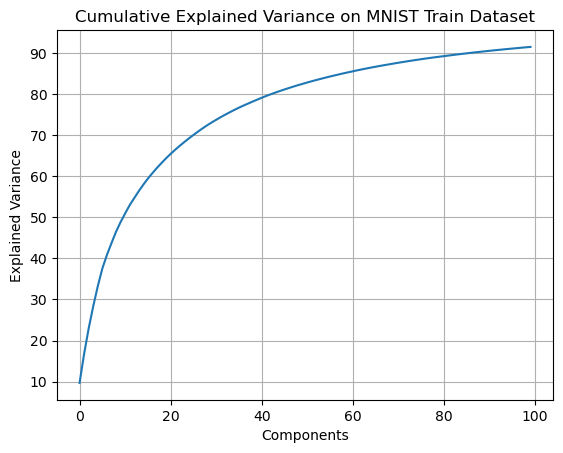

In [84]:
N_COMPONENTS=100

pca = PCA(N_COMPONENTS)
mnist_train_pca = pca.fit_transform(train_images_np)

#print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained by {N_COMPONENTS} components: {sum(pca.explained_variance_ratio_)*100:.2f}%")

# plot total explained variance given the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.title('Cumulative Explained Variance on MNIST Train Dataset')
plt.xlabel(f'Components')
plt.ylabel(f'Explained Variance')
plt.grid(True)
plt.show()

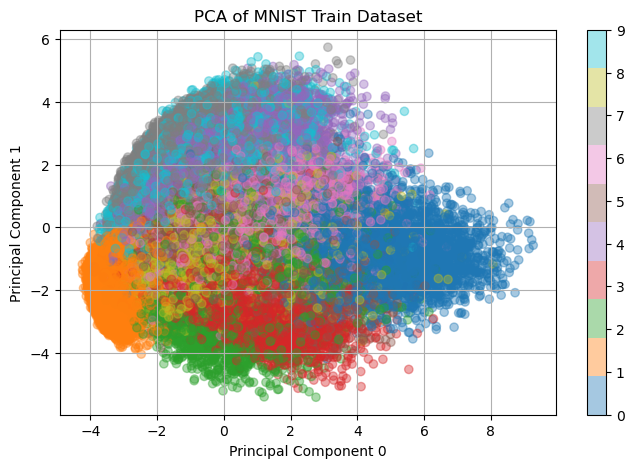

In [77]:
_pca_idx_x = 0
_pca_idx_y = 1

plt.figure(figsize=(8,5))
scatter = plt.scatter(mnist_train_pca[:, _pca_idx_x], mnist_train_pca[:, _pca_idx_y], c=train_labels, cmap='tab10', alpha=0.4)
plt.colorbar(scatter)
plt.title('PCA of MNIST Train Dataset')
plt.xlabel(f'Principal Component {_pca_idx_x}')
plt.ylabel(f'Principal Component {_pca_idx_y}')
plt.grid(True)
plt.show()

Visualzations show obvious clustering of various digits even with a highly naive PCA on the raw pixel values. It's interesting to guess which semantic characteristics the components might correspond to.

### 2.2 t-SNE

In [ ]:
# t-sne
from sklearn.manifold import TSNE

## 3. Unsupervised Learning

In [ ]:
# embeddings, representations, self-supervised learning